In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [ ]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

filter_digits = (y == 0) | (y == 1)
X, y = X[filter_digits], y[filter_digits]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp)

print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_val.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (10346, 784)
Validation set size: (1478, 784)
Test set size: (2956, 784)


Number of Support Vectors: 75


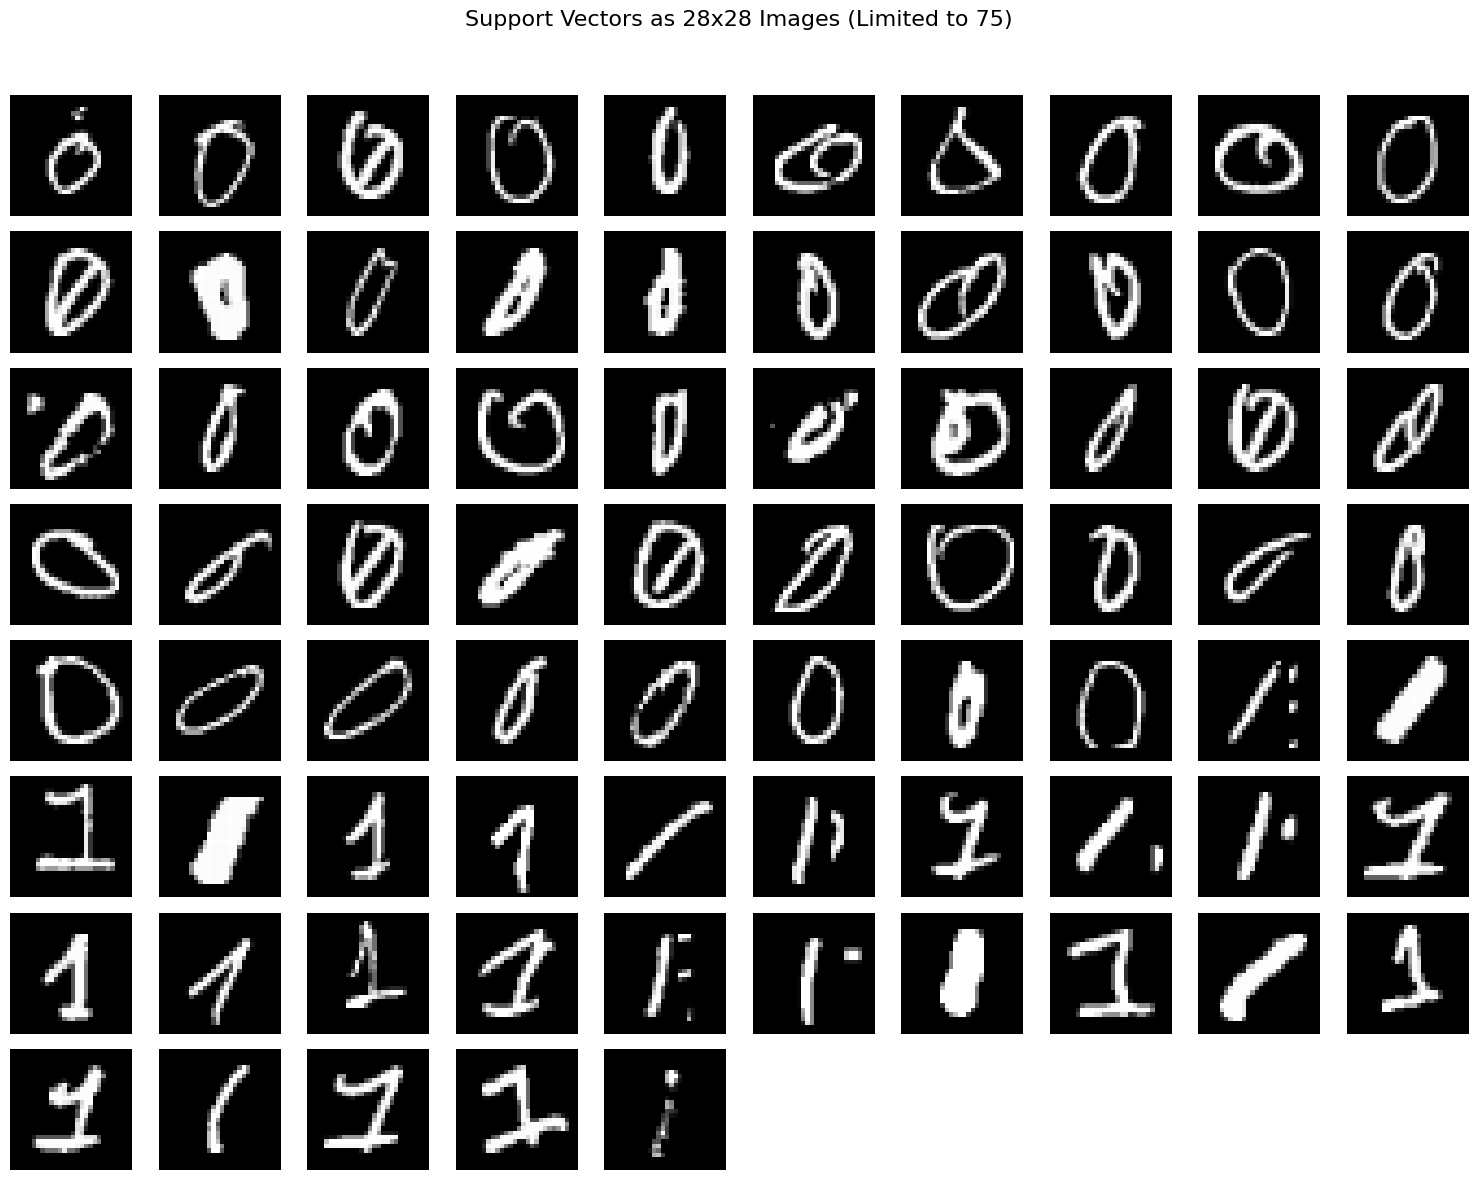

In [ ]:
svm_classifier = SVC(kernel='linear', C=1E10, )
svm_classifier.fit(X_train, y_train)

support_vectors = svm_classifier.support_vectors_
n_support_vectors = support_vectors.shape[0]
print(f"Number of Support Vectors: {n_support_vectors}")
max_display = 75
if n_support_vectors > max_display:
    np.random.seed(42)  # For reproducibility
    selected_indices = np.random.choice(n_support_vectors, max_display, replace=False)
    selected_support_vectors = support_vectors[selected_indices]
else:
    selected_support_vectors = support_vectors

fig, axes = plt.subplots(8, 10, figsize=(15, 12))

# Flatten the axes array to make indexing simpler
axes = axes.ravel()

for i in range(len(selected_support_vectors)):
    axes[i].imshow(selected_support_vectors[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')

# Set the axes that are not used to 'off'
for i in range(len(selected_support_vectors), len(axes)):
    axes[i].axis('off')

plt.suptitle("Support Vectors as 28x28 Images (Limited to 75)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include the title
plt.show()

Dual Coefficients Shape: (1, 75)


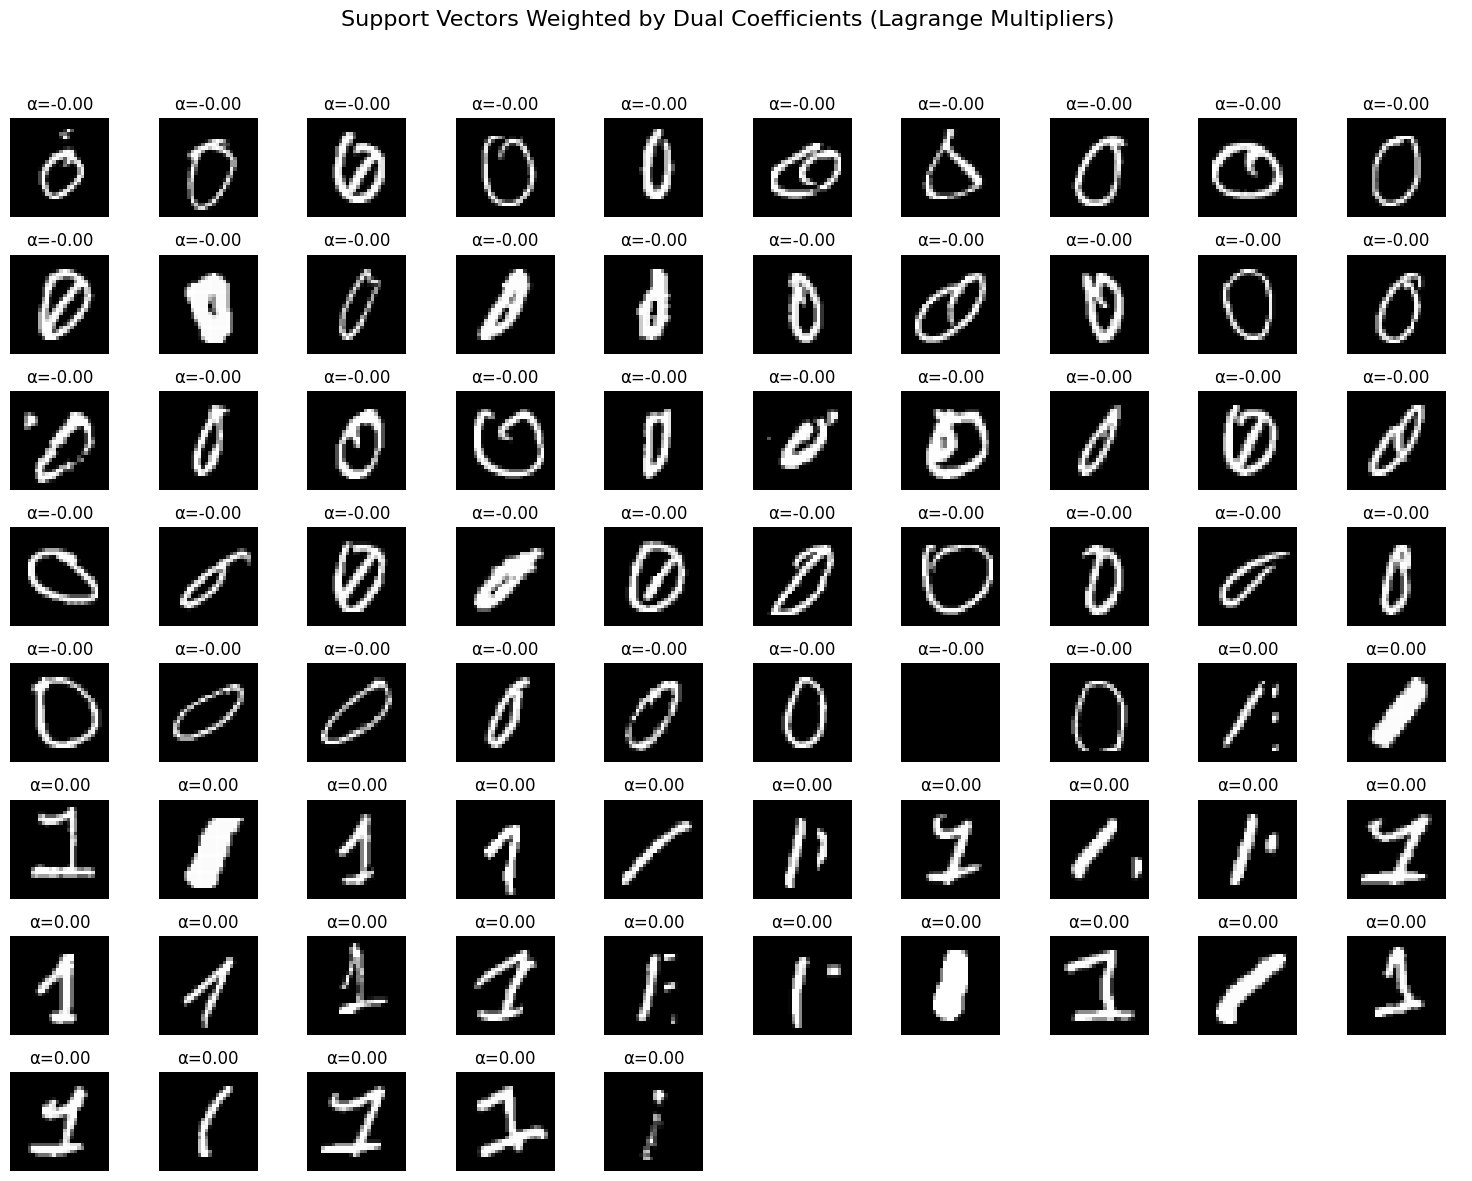

In [ ]:
dual_coefficients = svm_classifier.dual_coef_
print(f"Dual Coefficients Shape: {dual_coefficients.shape}")

normalized_dual_coefficients = (dual_coefficients - np.min(dual_coefficients)) / (np.max(dual_coefficients) - np.min(dual_coefficients))

fig, axes = plt.subplots(8, 10, figsize=(15, 12))
axes = axes.ravel()

support_vectors = svm_classifier.support_vectors_

for i in range(min(len(support_vectors), len(axes))):
    img = support_vectors[i].reshape(28, 28)

    img = img * normalized_dual_coefficients[0, i]

    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"α={dual_coefficients[0, i]:.2f}")
    axes[i].axis('off')

for i in range(len(support_vectors), len(axes)):
    axes[i].axis('off')

plt.suptitle("Support Vectors Weighted by Dual Coefficients (Lagrange Multipliers)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


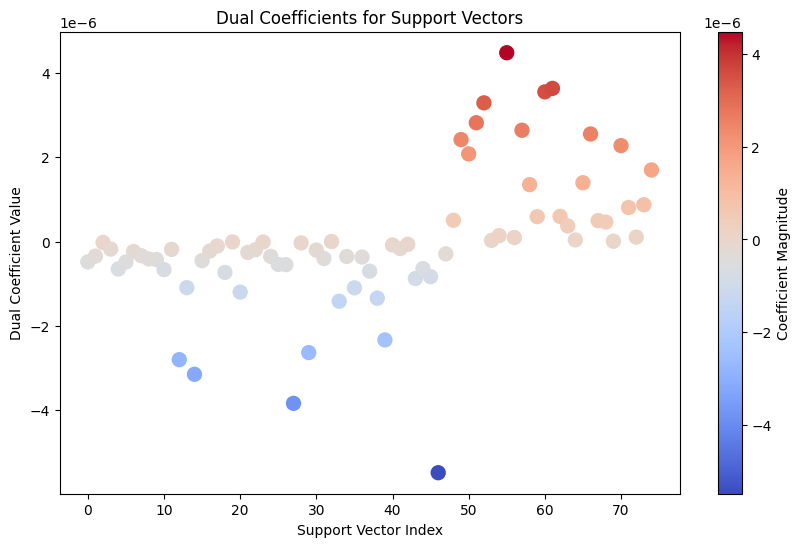

Dual Coefficients Analysis:
Number of Support Vectors: 75
Dual Coefficient Shape: (1, 75)

Summary Statistics of Dual Coefficients:
Min: -5.483498637727217e-06
Max: 4.478313826948782e-06
Mean: -5.646886315028669e-24
Standard Deviation: 1.601315139114703e-06


In [ ]:
dual_coef = svm_classifier.dual_coef_
support_vectors = svm_classifier.support_vectors_
n_support_vectors = support_vectors.shape[0]

plt.figure(figsize=(10, 6))

plt.scatter(range(n_support_vectors), dual_coef[0],
            c=dual_coef[0], cmap='coolwarm',
            marker='o', s=100)
plt.title('Dual Coefficients for Support Vectors')
plt.xlabel('Support Vector Index')
plt.ylabel('Dual Coefficient Value')
plt.colorbar(label='Coefficient Magnitude')

plt.show()

print("Dual Coefficients Analysis:")
print(f"Number of Support Vectors: {n_support_vectors}")
print(f"Dual Coefficient Shape: {dual_coef.shape}")
print("\nSummary Statistics of Dual Coefficients:")
print(f"Min: {dual_coef[0].min()}")
print(f"Max: {dual_coef[0].max()}")
print(f"Mean: {dual_coef[0].mean()}")
print(f"Standard Deviation: {dual_coef[0].std()}")

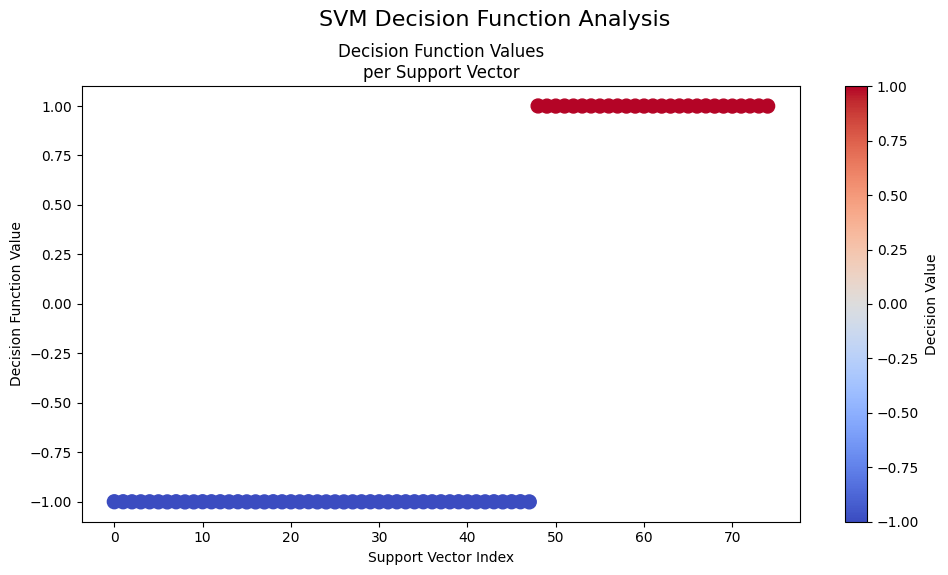

Decision Function Analysis:
Number of Support Vectors: 75

Summary Statistics of Decision Function Values:
Min: -1.000480846216348
Max: 1.0004603920240345
Mean: -0.28000000000000075
Standard Deviation: 0.9599457956940768


In [ ]:
decision_values = svm_classifier.decision_function(support_vectors)

# Visualization
plt.figure(figsize=(10, 6))

scatter = plt.scatter(range(len(decision_values)), decision_values,
                      c=decision_values, cmap='coolwarm',
                      marker='o', s=100)
plt.title('Decision Function Values\nper Support Vector')
plt.xlabel('Support Vector Index')
plt.ylabel('Decision Function Value')
plt.colorbar(scatter, label='Decision Value')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('SVM Decision Function Analysis', fontsize=16)
plt.show()

print("Decision Function Analysis:")
print(f"Number of Support Vectors: {len(support_vectors)}")
print("\nSummary Statistics of Decision Function Values:")
print(f"Min: {decision_values.min()}")
print(f"Max: {decision_values.max()}")
print(f"Mean: {decision_values.mean()}")
print(f"Standard Deviation: {decision_values.std()}")

Number of Support Vectors: 510


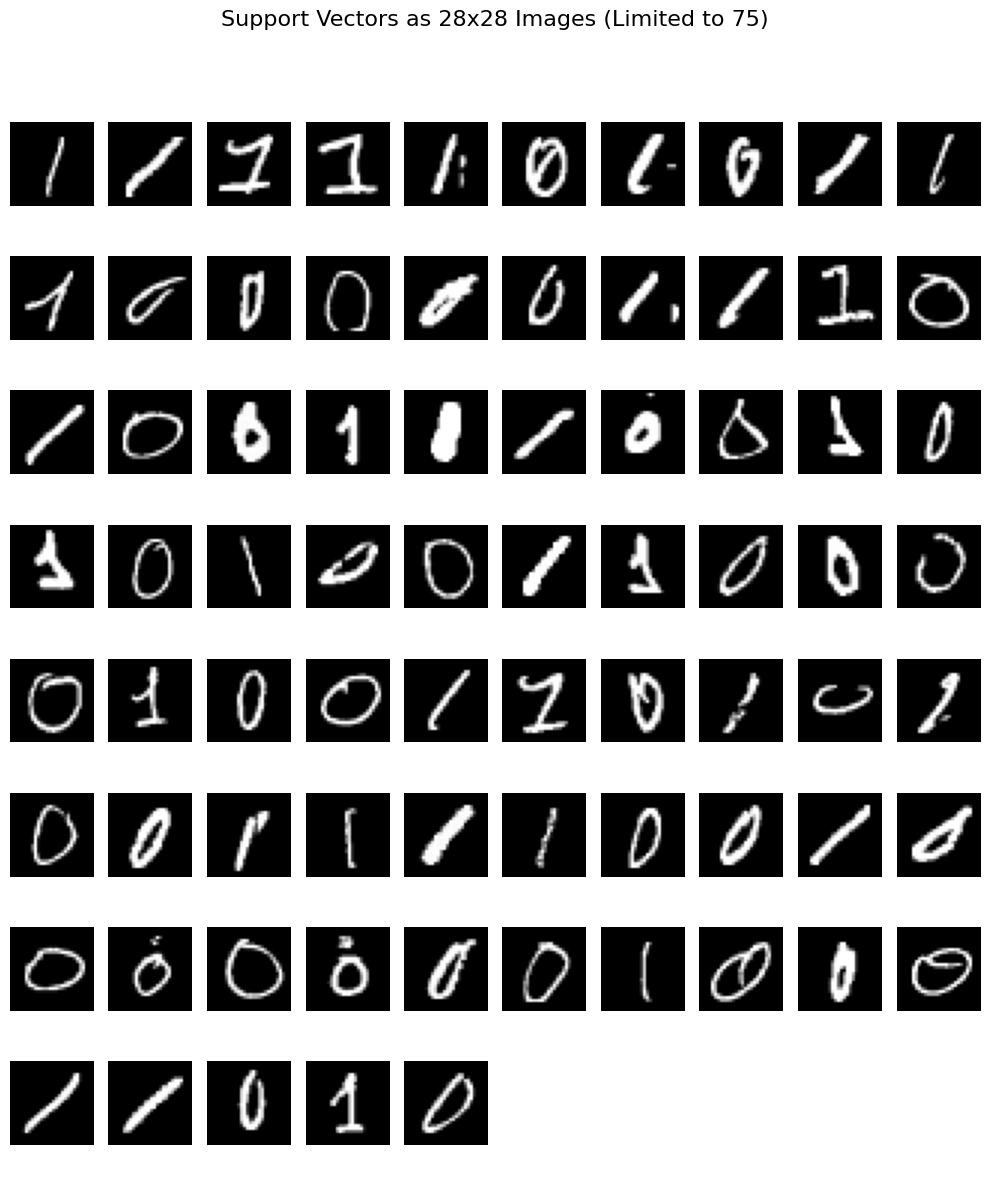

Dual Coefficients Analysis:
Number of Support Vectors: 510
Dual Coefficient Shape: (1, 510)

Summary Statistics of Dual Coefficients:
Min: -1e-08
Max: 1e-08
Mean: 0.0
Standard Deviation: 9.794255518513469e-09


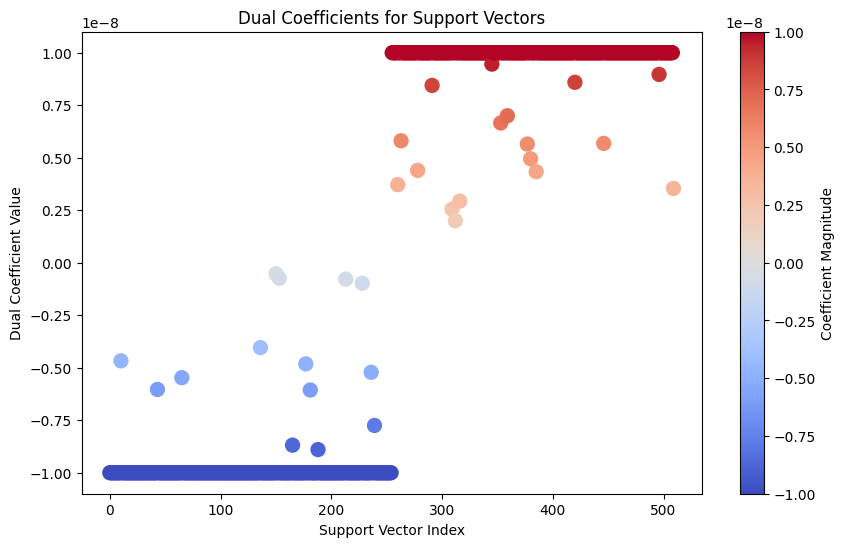

Decision Function Analysis:
Number of Support Vectors: 510

Summary Statistics of Decision Function Values:
Min: -1.000377491276263
Max: 1.0002150404814547
Mean: 0.03319821597451977
Standard Deviation: 0.8100386539943097


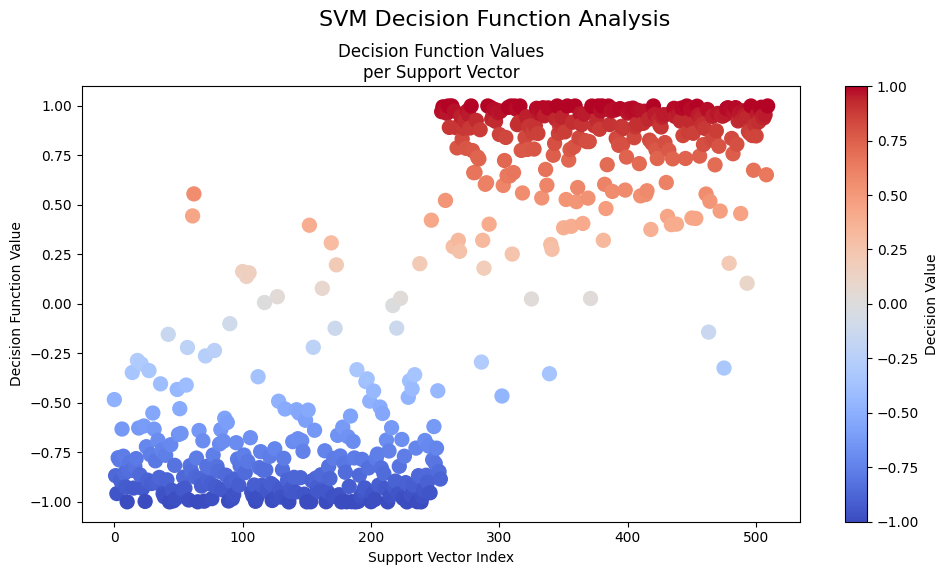

In [ ]:
svm_classifier = SVC(kernel='linear', C=1e-8, random_state=42)
svm_classifier.fit(X_train, y_train)

support_vectors = svm_classifier.support_vectors_
n_support_vectors = support_vectors.shape[0]
print(f"Number of Support Vectors: {n_support_vectors}")
max_display = 75
if n_support_vectors > max_display:
    np.random.seed(42)
    selected_indices = np.random.choice(n_support_vectors, max_display, replace=False)
    selected_support_vectors = support_vectors[selected_indices]
else:
    selected_support_vectors = support_vectors

fig, axes = plt.subplots(8, 10, figsize=(10, 12))
axes = axes.ravel()

for i in range(len(selected_support_vectors)):
    axes[i].imshow(selected_support_vectors[i].reshape(28, 28), cmap='gray')
    axes[i].axis('off')

for i in range(len(selected_support_vectors), len(axes)):
    axes[i].axis('off')

plt.suptitle("Support Vectors as 28x28 Images (Limited to 75)", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

dual_coef = svm_classifier.dual_coef_
support_vectors = svm_classifier.support_vectors_
n_support_vectors = support_vectors.shape[0]

print("Dual Coefficients Analysis:")
print(f"Number of Support Vectors: {n_support_vectors}")
print(f"Dual Coefficient Shape: {dual_coef.shape}")
print("\nSummary Statistics of Dual Coefficients:")
print(f"Min: {dual_coef[0].min()}")
print(f"Max: {dual_coef[0].max()}")
print(f"Mean: {dual_coef[0].mean()}")
print(f"Standard Deviation: {dual_coef[0].std()}")

plt.figure(figsize=(10, 6))

plt.scatter(range(n_support_vectors), dual_coef[0],
            c=dual_coef[0], cmap='coolwarm',
            marker='o', s=100)
plt.title('Dual Coefficients for Support Vectors')
plt.xlabel('Support Vector Index')
plt.ylabel('Dual Coefficient Value')
plt.colorbar(label='Coefficient Magnitude')
plt.show()


decision_values = svm_classifier.decision_function(support_vectors)

print("Decision Function Analysis:")
print(f"Number of Support Vectors: {len(support_vectors)}")
print("\nSummary Statistics of Decision Function Values:")
print(f"Min: {decision_values.min()}")
print(f"Max: {decision_values.max()}")
print(f"Mean: {decision_values.mean()}")
print(f"Standard Deviation: {decision_values.std()}")

plt.figure(figsize=(10, 6))

scatter = plt.scatter(range(len(decision_values)), decision_values,
                      c=decision_values, cmap='coolwarm',
                      marker='o', s=100)
plt.title('Decision Function Values\nper Support Vector')
plt.xlabel('Support Vector Index')
plt.ylabel('Decision Function Value')
plt.colorbar(scatter, label='Decision Value')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.suptitle('SVM Decision Function Analysis', fontsize=16)
plt.show()


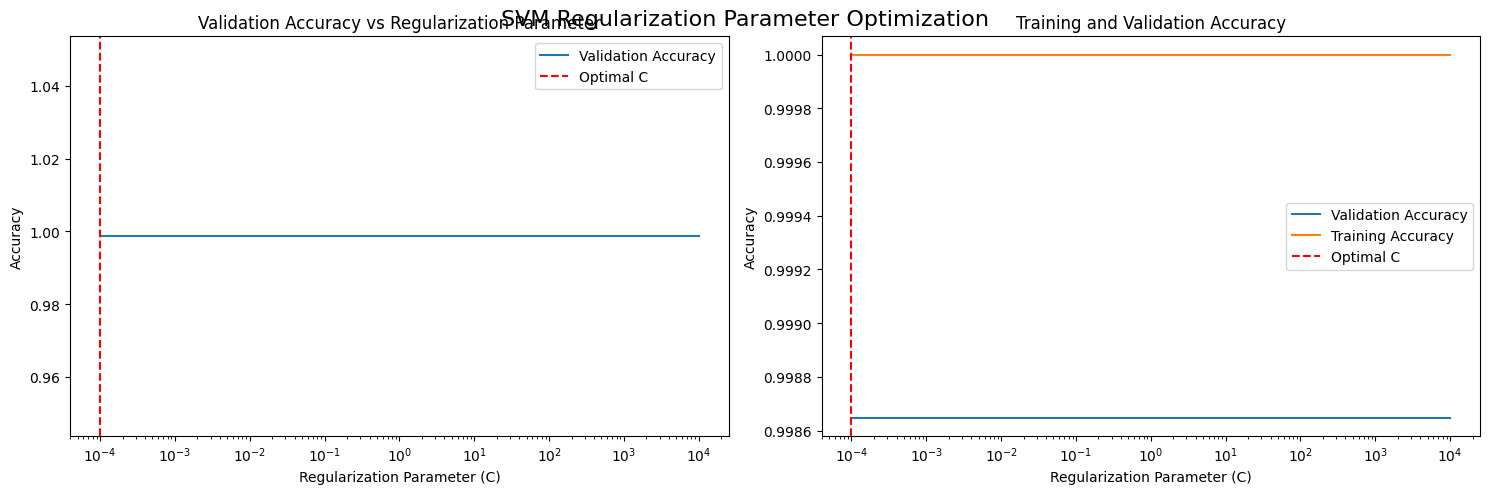

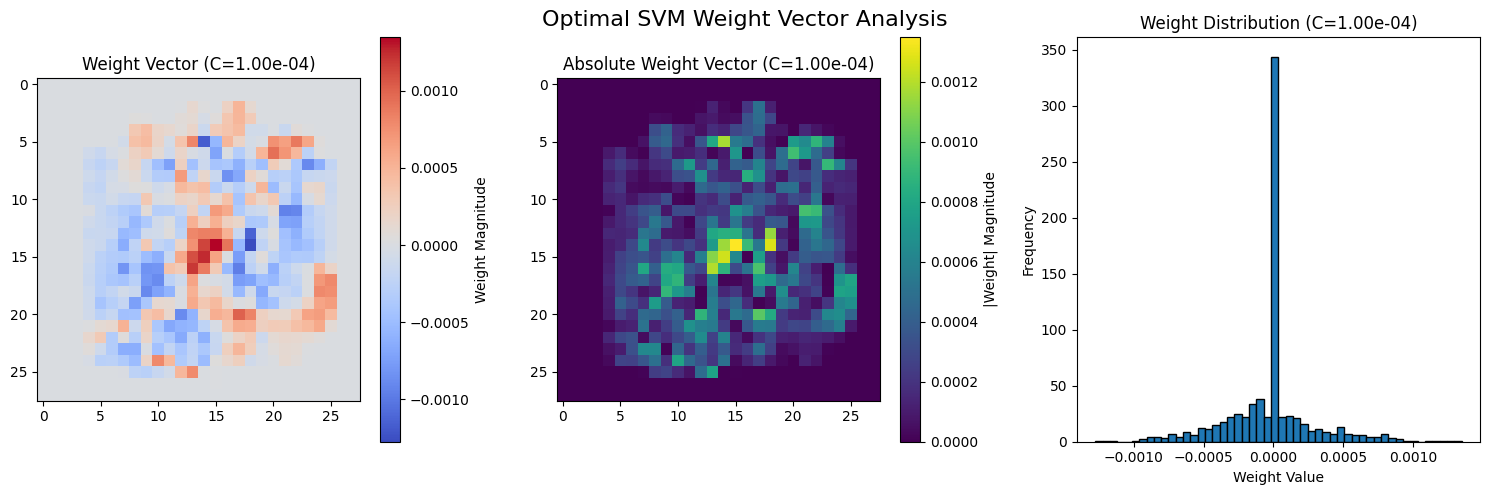


Optimal Regularization Results:
Optimal C Value: 1.00e-04
Validation Accuracy at Optimal C: 0.9986
Test Accuracy: 1.0000

Optimal Weight Vector Statistics:
Minimum weight: -0.0012770560166100505
Maximum weight: 0.001348163580486127
Mean of weights: -2.3746057697868987e-05
Standard deviation of weights: 0.0003156416093222033
Norm of weight vector: 0.00886293995357599


In [ ]:
C_values = np.logspace(-4, 4, 20)
val_accuracies = []
train_accuracies = []

for C in C_values:

    svm_classifier = SVC(kernel='linear', C=C, random_state=42)
    svm_classifier.fit(X_train, y_train)

    val_pred = svm_classifier.predict(X_val)
    train_pred = svm_classifier.predict(X_train)

    val_accuracy = accuracy_score(y_val, val_pred)
    train_accuracy = accuracy_score(y_train, train_pred)

    val_accuracies.append(val_accuracy)
    train_accuracies.append(train_accuracy)

optimal_C_index = np.argmax(val_accuracies)
optimal_C = C_values[optimal_C_index]

plt.figure(figsize=(15, 5))

# Plot Validation Accuracy
plt.subplot(1, 2, 1)
plt.semilogx(C_values, val_accuracies, label='Validation Accuracy')
plt.title('Validation Accuracy vs Regularization Parameter')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.axvline(x=optimal_C, color='r', linestyle='--', label='Optimal C')
plt.legend()

plt.subplot(1, 2, 2)
plt.semilogx(C_values, val_accuracies, label='Validation Accuracy')
plt.semilogx(C_values, train_accuracies, label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Regularization Parameter (C)')
plt.ylabel('Accuracy')
plt.axvline(x=optimal_C, color='r', linestyle='--', label='Optimal C')
plt.legend()

plt.tight_layout()
plt.suptitle('SVM Regularization Parameter Optimization', fontsize=16)
plt.show()

# Train SVM with optimal C and analyze
optimal_svm = SVC(kernel='linear', C=optimal_C, random_state=42)
optimal_svm.fit(X_train, y_train)

w_optimal = optimal_svm.coef_[0]
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(w_optimal.reshape(28, 28), cmap='coolwarm')
plt.title(f'Weight Vector (C={optimal_C:.2e})')
plt.colorbar(label='Weight Magnitude')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(w_optimal).reshape(28, 28), cmap='viridis')
plt.title(f'Absolute Weight Vector (C={optimal_C:.2e})')
plt.colorbar(label='|Weight| Magnitude')

plt.subplot(1, 3, 3)
plt.hist(w_optimal, bins=50, edgecolor='black')
plt.title(f'Weight Distribution (C={optimal_C:.2e})')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.suptitle('Optimal SVM Weight Vector Analysis', fontsize=16)
plt.show()

print("\nOptimal Regularization Results:")
print(f"Optimal C Value: {optimal_C:.2e}")
print(f"Validation Accuracy at Optimal C: {val_accuracies[optimal_C_index]:.4f}")

test_pred = optimal_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

print("\nOptimal Weight Vector Statistics:")
print(f"Minimum weight: {w_optimal.min()}")
print(f"Maximum weight: {w_optimal.max()}")
print(f"Mean of weights: {w_optimal.mean()}")
print(f"Standard deviation of weights: {w_optimal.std()}")
print(f"Norm of weight vector: {np.linalg.norm(w_optimal)}")

Classification for Digits 0 vs 1:

Classification Report for Digits 0 vs 1:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1381
           1       1.00      1.00      1.00      1575

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



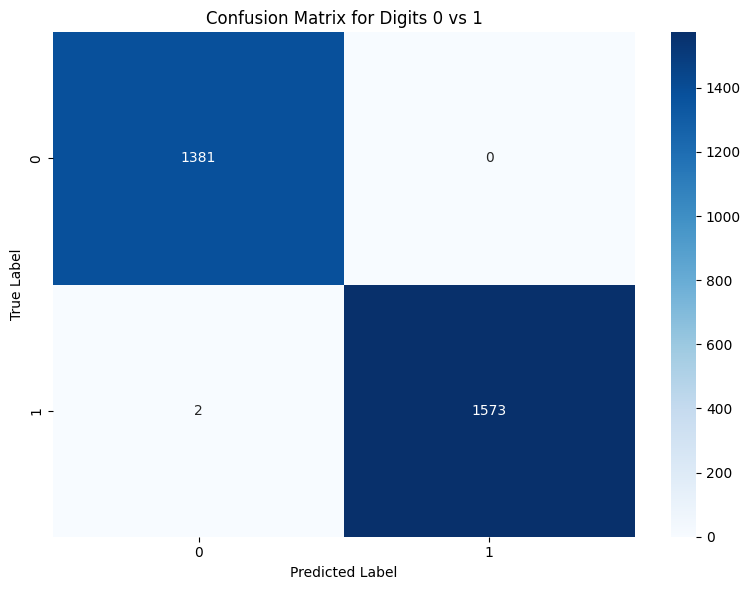


Accuracy Breakdown for Digits 0 vs 1:
Training Accuracy: 1.0000
Validation Accuracy: 0.9973
Test Accuracy: 0.9993
Number of Support Vectors: 93


Classification for Digits 2 vs 3:

Classification Report for Digits 2 vs 3:
              precision    recall  f1-score   support

           2       0.96      0.97      0.96      1398
           3       0.97      0.96      0.96      1429

    accuracy                           0.96      2827
   macro avg       0.96      0.96      0.96      2827
weighted avg       0.96      0.96      0.96      2827



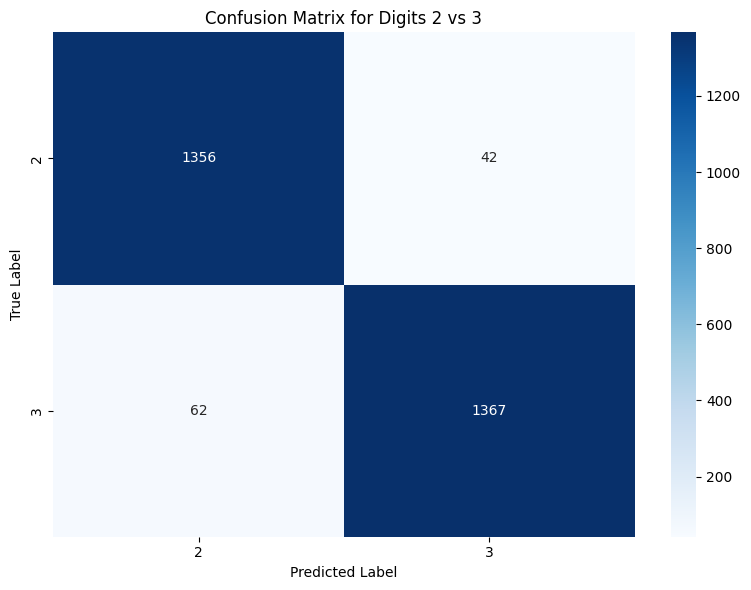


Accuracy Breakdown for Digits 2 vs 3:
Training Accuracy: 0.9930
Validation Accuracy: 0.9611
Test Accuracy: 0.9632
Number of Support Vectors: 606


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

def classify_digit_pair(digits):
    # Load MNIST dataset
    X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
    y = y.astype(int)

    filter_digits = (y == digits[0]) | (y == digits[1])
    X_filtered, y_filtered = X[filter_digits], y[filter_digits]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_filtered)

    X_train, X_temp, y_train, y_temp = train_test_split(
        X_scaled, y_filtered, test_size=0.3, random_state=42, stratify=y_filtered
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=2/3, random_state=42, stratify=y_temp
    )

    svm_classifier = SVC(kernel='linear', random_state=42)
    svm_classifier.fit(X_train, y_train)

    train_accuracy = svm_classifier.score(X_train, y_train)
    val_accuracy = svm_classifier.score(X_val, y_val)
    test_accuracy = svm_classifier.score(X_test, y_test)

    y_pred = svm_classifier.predict(X_test)

    print(f"\nClassification Report for Digits {digits[0]} vs {digits[1]}:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[digits[0], digits[1]],
                yticklabels=[digits[0], digits[1]])
    plt.title(f'Confusion Matrix for Digits {digits[0]} vs {digits[1]}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.show()

    print(f"\nAccuracy Breakdown for Digits {digits[0]} vs {digits[1]}:")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Number of Support Vectors: {len(svm_classifier.support_vectors_)}")

    return svm_classifier

print("Classification for Digits 0 vs 1:")
svm_0_1 = classify_digit_pair([0, 1])

print("\n" + "="*50 + "\n")

print("Classification for Digits 2 vs 3:")
svm_2_3 = classify_digit_pair([2, 3])

# **Kernel Classifier**

support vectors

Polynomial Kernel Classification:

POLY Kernel Classification Report:
Validation Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       722
           1       1.00      1.00      1.00       756

    accuracy                           1.00      1478
   macro avg       1.00      1.00      1.00      1478
weighted avg       1.00      1.00      1.00      1478


Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1402
           1       1.00      1.00      1.00      1554

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



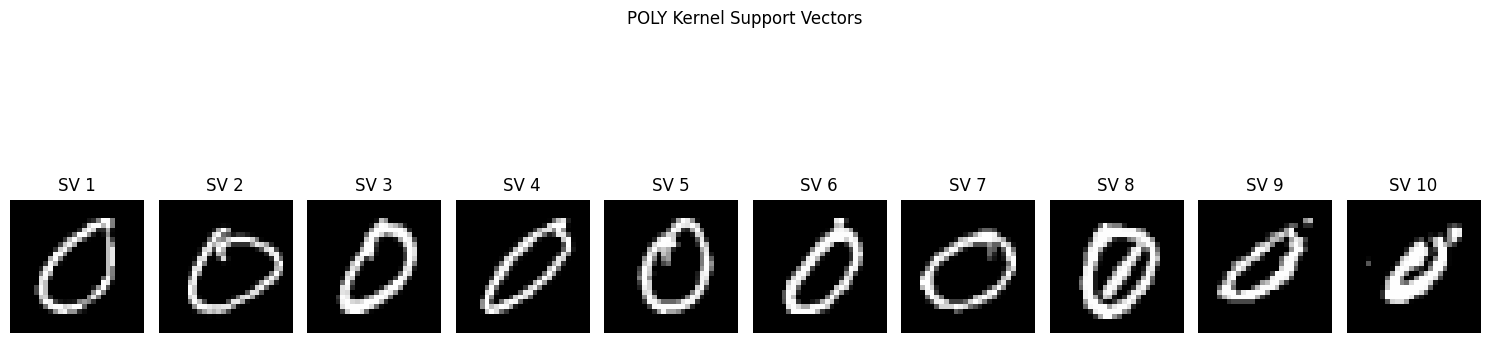


RBF Kernel Classification:

RBF Kernel Classification Report:
Validation Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       722
           1       1.00      0.99      0.99       756

    accuracy                           0.99      1478
   macro avg       0.99      0.99      0.99      1478
weighted avg       0.99      0.99      0.99      1478


Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1402
           1       1.00      0.99      0.99      1554

    accuracy                           0.99      2956
   macro avg       0.99      0.99      0.99      2956
weighted avg       0.99      0.99      0.99      2956



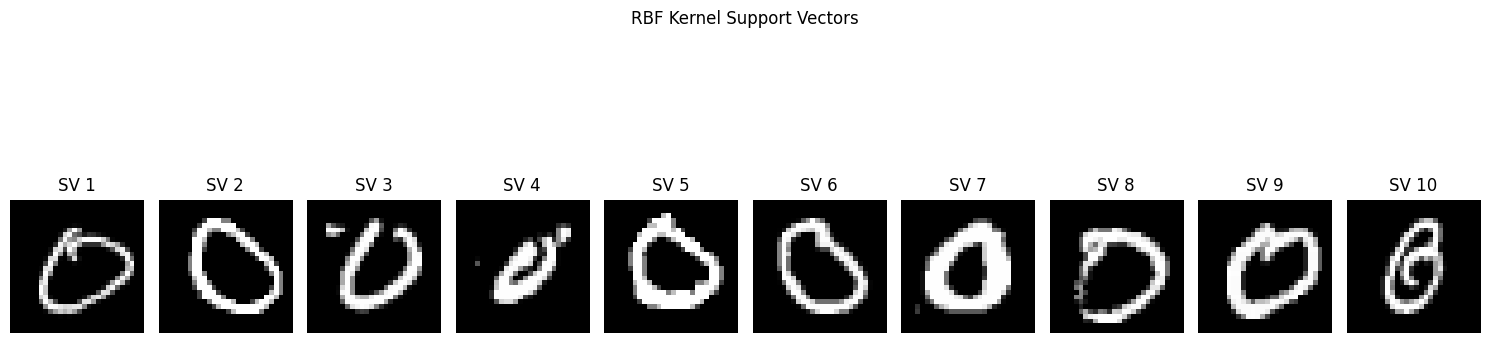

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load MNIST dataset
def load_mnist_binary(digit1=0, digit2=1):
    # Fetch MNIST dataset
    mnist = fetch_openml('mnist_784', version=1, as_frame=False, parser='auto')
    X, y = mnist.data, mnist.target

    y = y.astype(int)

    mask = (y == digit1) | (y == digit2)
    X_binary = X[mask]
    y_binary = y[mask]
    y_binary = (y_binary == digit2).astype(int)

    return X_binary, y_binary

def visualize_support_vectors(X, support_vectors, title):
    plt.figure(figsize=(15, 5))
    n_svs = min(10, len(support_vectors))

    for i in range(n_svs):
        plt.subplot(1, n_svs, i+1)
        plt.imshow(support_vectors[i].reshape(28, 28), cmap='gray')
        plt.title(f'SV {i+1}')
        plt.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def kernel_classification(X, y, kernel='rbf'):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train_scaled, y_train)

    y_val_pred = svm.predict(X_val_scaled)
    y_test_pred = svm.predict(X_test_scaled)

    print(f"\n{kernel.upper()} Kernel Classification Report:")
    print("Validation Set:")
    print(classification_report(y_val, y_val_pred))

    print("\nTest Set:")
    print(classification_report(y_test, y_test_pred))

    support_vectors = svm.support_vectors_
    support_vectors_original = scaler.inverse_transform(support_vectors)
    visualize_support_vectors(X, support_vectors_original,
                               f'{kernel.upper()} Kernel Support Vectors')

    return svm, support_vectors_original

X_binary, y_binary = load_mnist_binary(0, 1)

print("Polynomial Kernel Classification:")
poly_svm, poly_svs = kernel_classification(X_binary, y_binary, kernel='poly')

print("\nRBF Kernel Classification:")
rbf_svm, rbf_svs = kernel_classification(X_binary, y_binary, kernel='rbf')

dual coefficients

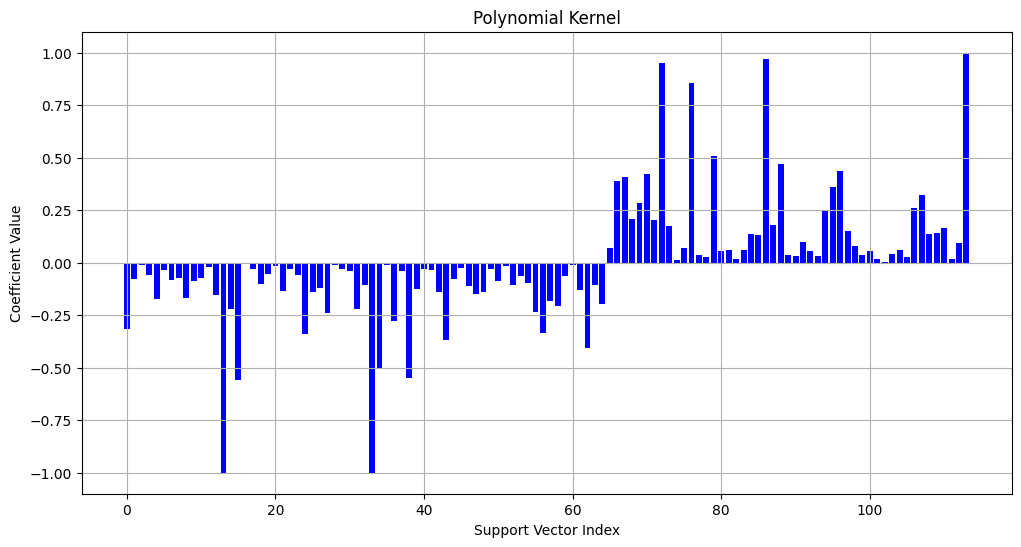

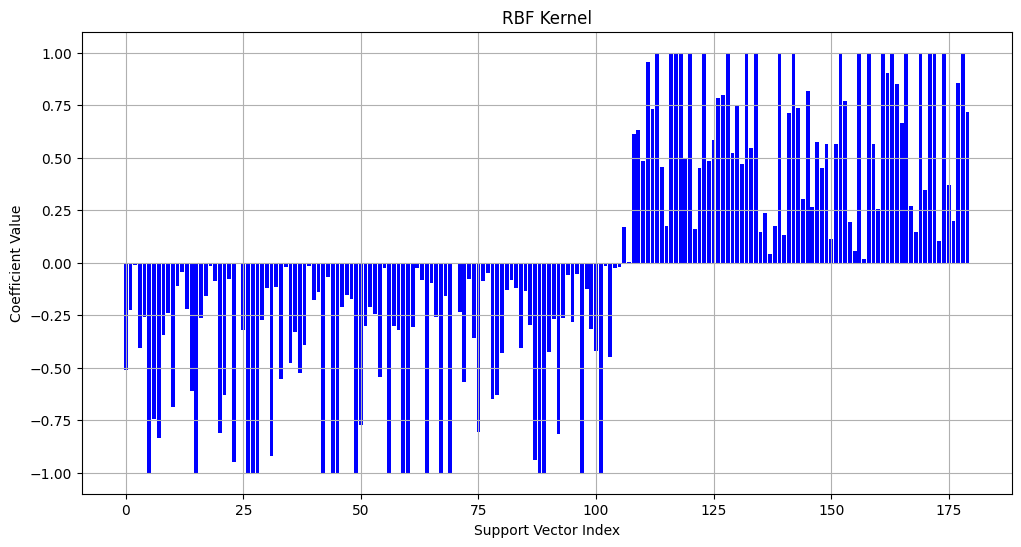

In [ ]:

from sklearn import svm

import matplotlib.pyplot as plt

def plot_dual_coefficients(svm_model, title):
    dual_coefs = svm_model.dual_coef_.ravel()
    plt.figure(figsize=(12, 6))
    plt.bar(range(len(dual_coefs)), dual_coefs, color='blue')
    plt.title(title)
    plt.xlabel('Support Vector Index')
    plt.ylabel('Coefficient Value')
    plt.grid(True)
    plt.show()

svm_poly = svm.SVC(kernel='poly', degree=3, C=1.0, coef0=1)
svm_poly.fit(X_train, y_train)

svm_rbf = svm.SVC(kernel='rbf', gamma='scale', C=1.0)
svm_rbf.fit(X_train, y_train)

plot_dual_coefficients(svm_poly, 'Polynomial Kernel')
plot_dual_coefficients(svm_rbf, 'RBF Kernel')

decision function

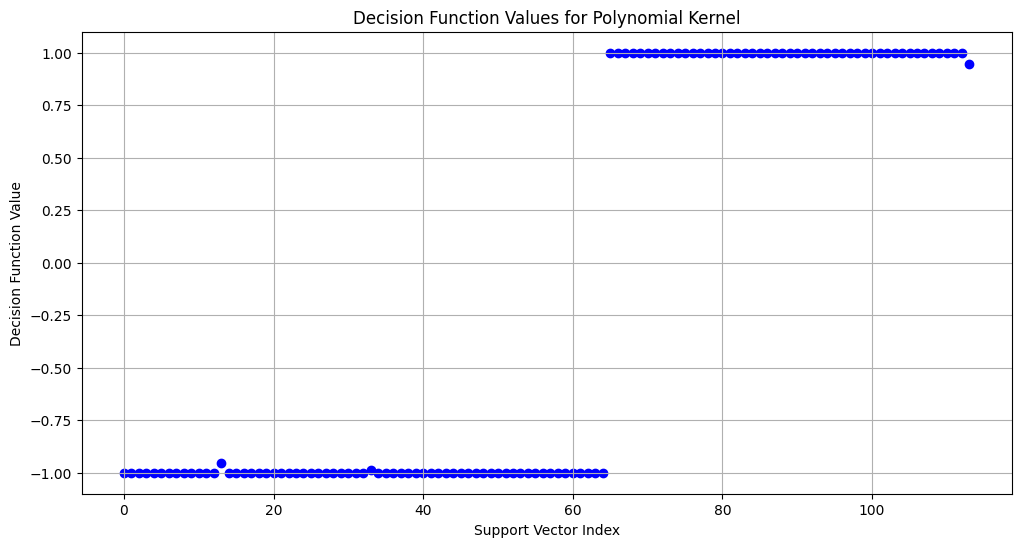

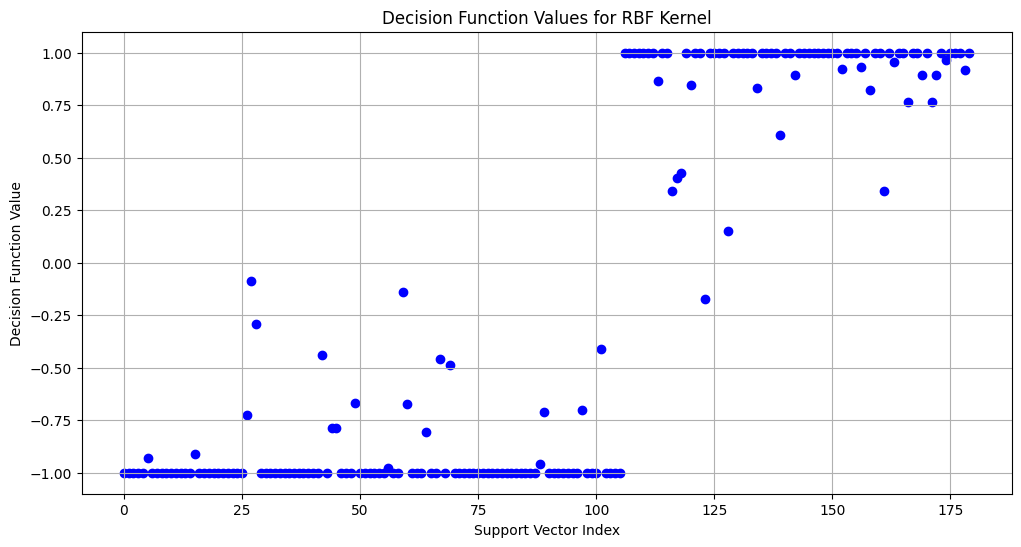

In [ ]:
#decision_function

import matplotlib.pyplot as plt

def plot_decision_function(svm_model, X_support, title):
    decision_values = svm_model.decision_function(X_support)

    plt.figure(figsize=(12, 6))
    plt.scatter(range(len(decision_values)), decision_values, color='blue')
    plt.title(f'Decision Function Values for {title}')
    plt.xlabel('Support Vector Index')
    plt.ylabel('Decision Function Value')
    plt.grid(True)
    plt.show()


X_support_poly = svm_poly.support_vectors_
X_support_rbf = svm_rbf.support_vectors_

# Plot decision function values for both kernels
plot_decision_function(svm_poly, X_support_poly, 'Polynomial Kernel')
plot_decision_function(svm_rbf, X_support_rbf, 'RBF Kernel')


Using the validation data, determine the optimal value of the regularization parameter. Using
score, determine the accuracy of the classification in the 0-1 and 2-3 settings

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

# Print initial class distribution
print("Initial class distribution:", np.bincount(y))

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

X_01 = X[(y == 0) | (y == 1)]
y_01 = y[(y == 0) | (y == 1)]

X_23 = X[(y == 2) | (y == 3)]
y_23 = y[(y == 2) | (y == 3)]

print("Count of class 2-3 samples:", len(y_23))

if len(y_23) > 0:
    # Evaluation function here
    pass
else:
    print("No samples found for classes 2 and 3. Check data filtering or dataset.")


def train_and_evaluate(X_data, y_data):
    X_train, X_temp, y_train, y_temp = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    param_grid = {'C': [0.1, 1, 10, 100, 1000]}
    svm_model = svm.SVC(kernel='rbf', gamma='scale')
    grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_val, y_val)

    best_C = grid_search.best_params_['C']
    print(f"Optimal C value: {best_C}")

    optimal_svm = svm.SVC(kernel='rbf', C=best_C, gamma='scale')
    optimal_svm.fit(X_train, y_train)

    y_pred = optimal_svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy on test set: {accuracy}")
    return accuracy

# Evaluate for 0-1 settings
print("Evaluating for class 0-1 settings:")
accuracy_01 = train_and_evaluate(X_01, y_01)

# Evaluate for 2-3 settings
print("Evaluating for class 2-3 settings:")
accuracy_23 = train_and_evaluate(X_23, y_23)


Initial class distribution: [6903 7877]
Count of class 2-3 samples: 14131
Evaluating for class 0-1 settings:
Optimal C value: 10
Accuracy on test set: 1.0
Evaluating for class 2-3 settings:
Optimal C value: 10
Accuracy on test set: 0.9943422913719944


# **Multiclass Classiffier**

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Load the MNIST dataset
(x_train_full, y_train_full), (x_test_full, y_test_full) = tf.keras.datasets.mnist.load_data()

desired_digits = [0, 1, 2, 3]

filter_train = np.isin(y_train_full, desired_digits)
x_train_filtered, y_train_filtered = x_train_full[filter_train], y_train_full[filter_train]

filter_test = np.isin(y_test_full, desired_digits)
x_test_filtered, y_test_filtered = x_test_full[filter_test], y_test_full[filter_test]

x_train_filtered = x_train_filtered / 255.0
x_test_filtered = x_test_filtered / 255.0

x_train, x_val, y_train, y_val = train_test_split(
    x_train_filtered, y_train_filtered, test_size=0.3, random_state=42
)

x_val, x_validation, y_val, y_validation = train_test_split(
    x_val, y_val, test_size=0.3333, random_state=42
)

x_train = x_train.reshape(-1, 28, 28, 1)
x_validation = x_validation.reshape(-1, 28, 28, 1)
x_test_filtered = x_test_filtered.reshape(-1, 28, 28, 1)

print(f"Training dataset: {x_train.shape}, {y_train.shape}")
print(f"Validation dataset: {x_validation.shape}, {y_validation.shape}")
print(f"Test dataset: {x_test_filtered.shape}, {y_test_filtered.shape}")


Training dataset: (17327, 28, 28, 1), (17327,)
Validation dataset: (2476, 28, 28, 1), (2476,)
Test dataset: (4157, 28, 28, 1), (4157,)


Training One-vs-Rest Classifier...
Training One-vs-One Classifier...


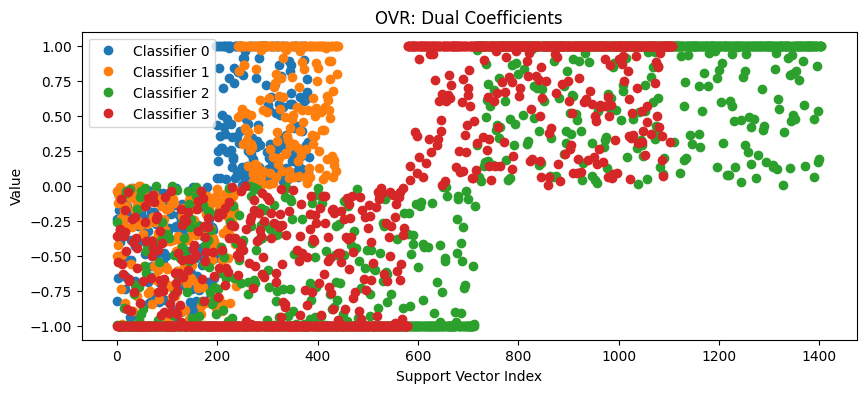

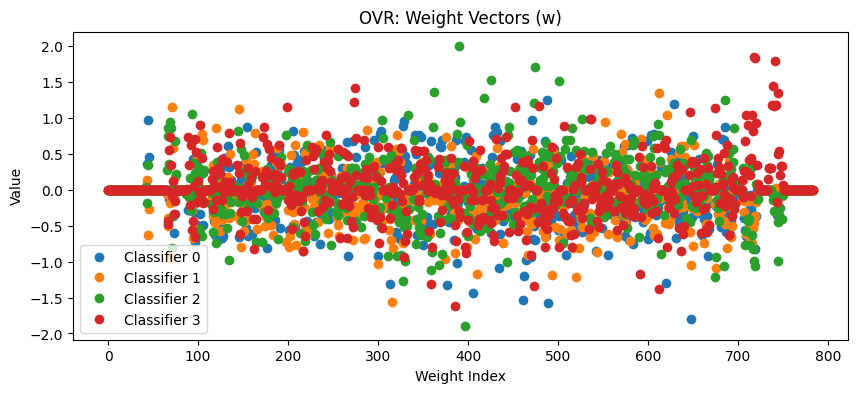

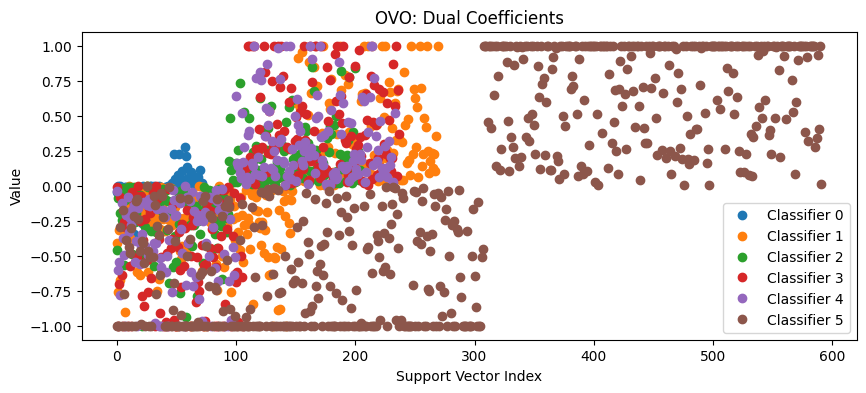

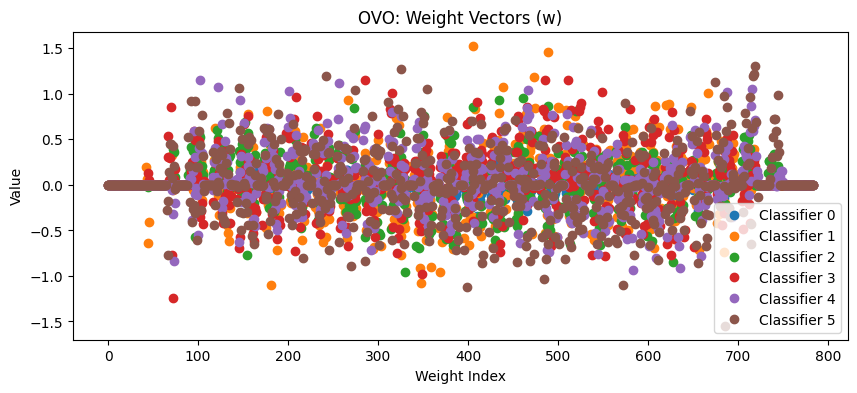

Number of dual coefficients in OVR: 3337
Number of dual coefficients in OVO: 1611


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import train_test_split

x_train_flat = x_train.reshape(x_train.shape[0], -1)
x_validation_flat = x_validation.reshape(x_validation.shape[0], -1)
x_test_flat = x_test_filtered.reshape(x_test_filtered.shape[0], -1)

print("Training One-vs-Rest Classifier...")
ovr_classifier = OneVsRestClassifier(SVC(kernel='linear', C=1))
ovr_classifier.fit(x_train_flat, y_train)

print("Training One-vs-One Classifier...")
ovo_classifier = OneVsOneClassifier(SVC(kernel='linear', C=1))
ovo_classifier.fit(x_train_flat, y_train)

def plot_dual_and_weights(model, title):
    plt.figure(figsize=(10, 4))
    for i, est in enumerate(model.estimators_):
        if hasattr(est, "dual_coef_"):
            dual_coef = est.dual_coef_.flatten()
            plt.plot(dual_coef, 'o', label=f'Classifier {i}')
    plt.title(f'{title}: Dual Coefficients')
    plt.xlabel('Support Vector Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

    weights = np.array([est.coef_.flatten() for est in model.estimators_ if hasattr(est, "coef_")])
    plt.figure(figsize=(10, 4))
    for i, weight in enumerate(weights):
        plt.plot(weight, 'o', label=f'Classifier {i}')
    plt.title(f'{title}: Weight Vectors (w)')
    plt.xlabel('Weight Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_dual_and_weights(ovr_classifier, "OVR")

plot_dual_and_weights(ovo_classifier, "OVO")

num_dual_ovr = sum(len(est.dual_coef_[0]) for est in ovr_classifier.estimators_ if hasattr(est, "dual_coef_"))
num_dual_ovo = sum(len(est.dual_coef_[0]) for est in ovo_classifier.estimators_ if hasattr(est, "dual_coef_"))

print(f"Number of dual coefficients in OVR: {num_dual_ovr}")
print(f"Number of dual coefficients in OVO: {num_dual_ovo}")


Performing Grid Search for Optimal C...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Optimal Regularization Parameter (C): 0.1
Classification Accuracy on Test Set: 0.98
Weight Vector (w): [0. 0. 0. ... 0. 0. 0.]


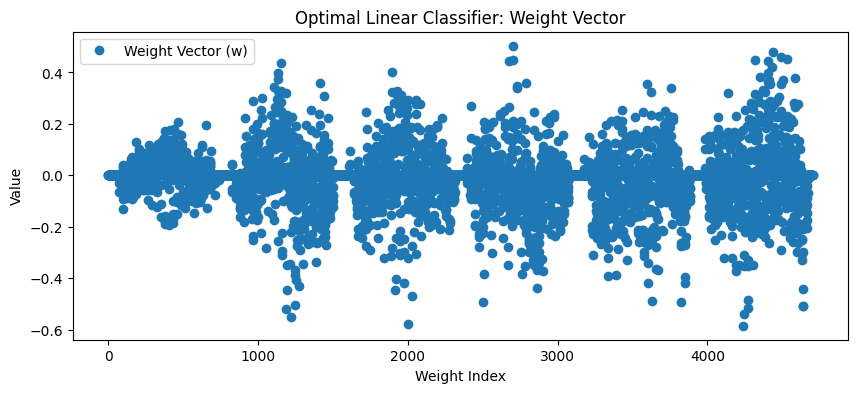

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

svm_model = SVC(kernel='linear')
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

print("Performing Grid Search for Optimal C...")
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train_flat, y_train)

best_C = grid_search.best_params_['C']
print(f"Optimal Regularization Parameter (C): {best_C}")

optimal_model = SVC(kernel='linear', C=best_C)
optimal_model.fit(x_train_flat, y_train)

y_test_pred = optimal_model.predict(x_test_flat)
test_accuracy = accuracy_score(y_test_filtered, y_test_pred)
print(f"Classification Accuracy on Test Set: {test_accuracy:.2f}")

weights = optimal_model.coef_.flatten()
print(f"Weight Vector (w): {weights}")

plt.figure(figsize=(10, 4))
plt.plot(weights, 'o', label='Weight Vector (w)')
plt.title('Optimal Linear Classifier: Weight Vector')
plt.xlabel('Weight Index')
plt.ylabel('Value')
plt.legend()
plt.show()


# Best SVM

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import tensorflow as tf

(x_train_full, y_train_full), (x_test_full, y_test_full) = tf.keras.datasets.mnist.load_data()

x_train_full = x_train_full.reshape(x_train_full.shape[0], -1) / 255.0
x_test_full = x_test_full.reshape(x_test_full.shape[0], -1) / 255.0

x_train, _, y_train, _ = train_test_split(x_train_full, y_train_full, test_size=0.8, random_state=42)

param_dist = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'decision_function_shape': ['ovo', 'ovr']
}

# Use RandomizedSearchCV for faster hyperparameter tuning
print("Performing Randomized Search for the Best SVM Classifier...")
svm = SVC()
random_search = RandomizedSearchCV(
    svm, param_distributions=param_dist, n_iter=20,
    scoring='accuracy', cv=3, verbose=1, n_jobs=-1, random_state=42
)
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_
print(f"Best Parameters: {best_params}")

y_test_pred = best_model.predict(x_test_full)
test_accuracy = accuracy_score(y_test_full, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.2f}")

print(f"Best SVM Classifier:\n{best_model}")


Performing Randomized Search for the Best SVM Classifier...
Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters: {'kernel': 'rbf', 'gamma': 'scale', 'decision_function_shape': 'ovo', 'C': 100}
Test Accuracy: 0.97
Best SVM Classifier:
SVC(C=100, decision_function_shape='ovo')
